In [1]:
%matplotlib inline
import os
import glob
import json
from collections import Counter, defaultdict

import urllib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

corr_perplexity = [
    0.17165578840484788, #USR-TC ID
 0.17297584254696088, # USR-PC ID
 0.1661315711340646, # UniEval-TC ID
 0.032366027140112996, # UBER-Topic OOD1
 0.010696948579908489, # CTRLEval-Topic OOD1
 -0.06846298997429787, #summEVal OOD2
 -0.11408465021570813, # UniEval-SummEval OOD2
 -0.16673806048197465 # Newsroom OOD2
]

In [3]:
# ID vs OOD-1 vs OOD-2
corr_perplexity_ = [np.mean(corr_perplexity[0:3]), np.mean(corr_perplexity[3:5]), np.mean(corr_perplexity[5:])]
corr_perplexity_

[0.1702544006952911, 0.02153148786001074, -0.11642856689066021]

In [4]:
# across NLG use cases: TextSumm, DiagGen, CtrlGen, 

corr_perplexity = np.array(corr_perplexity)
corr_perplexity_1 = [np.mean(corr_perplexity[5:]), np.mean(corr_perplexity[:3]), np.mean(corr_perplexity[3:5])]
corr_perplexity_1

[-0.11642856689066021, 0.1702544006952911, 0.02153148786001074]

In [5]:

corr_bleu = [
    0.3592525696328984, # Newsroom ID
 0.2247383747380582, # Unieval Summeval ID
     0.12053111969812824, # Summeval ID
 0.22904048750828201, # Unieval TC - OOD1
 0.1955577733470664, # USR TC OOD1
 0.11761478744841077 # USR PC OOD1
]

In [6]:
# ID vs OOD-1 vs OOD-2

corr_bleu_ = [np.mean(corr_bleu[:3]), np.mean(corr_bleu[3:]), 0.]
corr_bleu_

[0.23484068802302827, 0.1807376827679197, 0.0]

In [7]:
# across NLG use cases: DiagGen, CtrlGen, TextSumm


corr_bleu = np.array(corr_bleu)
corr_bleu_1 = [np.mean(corr_bleu[:3]), np.mean(corr_bleu[3:]), 0.]
corr_bleu_1

[0.23484068802302827, 0.1807376827679197, 0.0]

In [8]:
corr_rouge = [
    0.23446480891682248, #ID
 0.2247383747380582, #ID
 0.12550835076772485, #ID
 0.2769324064462076, #OOD1
 0.23355840734187128, #OOD1
 0.10495289929159608 #OOD1
]

In [9]:
# ID vs OOD-1 vs OOD-2

corr_rouge_ = [np.mean(corr_rouge[:3]), np.mean(corr_rouge[3:]), 0.]
corr_rouge_

[0.19490384480753517, 0.20514790435989164, 0.0]

In [10]:
# across NLG use cases: DiagGen, CtrlGen, TextSumm

corr_rouge = np.array(corr_rouge)
corr_rouge_1 = [np.mean(corr_rouge[:3]), np.mean(corr_rouge[3:]), 0.]
corr_rouge_1

[0.19490384480753517, 0.20514790435989164, 0.0]

In [11]:
corr_bleu_rouge = np.mean([corr_bleu_, corr_rouge_], axis=0)
corr_bleu_rouge

array([0.21487227, 0.19294279, 0.        ])

In [12]:
corr_bertsc = [
    0.29876976141021844,# unieval summeval ID
 0.15932068587461895, # summeval ID
 0.18134403280548386, # newsroom ID
 0.09665172447093777, # unieval TC OOD1
 0.08901202279441296, #usr tc OOD1
 0.038904003441765644, # usr pc OOD1
 0.07653050702942499, # uber topic OOD2
 0.03179195327739547 # ctrleval topic OOD2
]

In [13]:
# ID vs OOD-1 vs OOD-2

corr_bertsc_ = [np.mean(corr_bertsc[:3]), np.mean(corr_bertsc[3:6]), np.mean(corr_bertsc[6:])]
corr_bertsc_

[0.21314482669677373, 0.07485591690237213, 0.054161230153410234]

In [14]:
# across NLG use cases: TextSumm, DiagGen, CtrlGen, 

corr_bertsc = np.array(corr_bertsc)

corr_bertsc_1 = [np.mean(corr_bertsc[:3]), np.mean(corr_bertsc[3:6]), np.mean(corr_bertsc[6:])]
corr_bertsc_1

[0.21314482669677373, 0.07485591690237213, 0.054161230153410234]

In [15]:
corr_ctc = [
    0.24481788597506907, # summeval ID
 0.2772823994406213, # newsroom ID
 0.25693390877038963, # TC ID
 0.13865513258781878, # TC OOD1
 0.044175621551951164, # PC OOD1
 0.01753021306664179, # ctrleval summ OOD2
 0.031439811729561444 # # uber summ OOD2
]

In [16]:
# ID vs OOD-1 vs OOD-2

corr_ctc_ = [np.mean(corr_ctc[:3]), np.mean(corr_ctc[3:5]), np.mean(corr_ctc[5:])]
corr_ctc_

[0.2596780647286933, 0.09141537706988498, 0.024485012398101615]

In [17]:
# across NLG use cases: DiagGen, CtrlGen, TextSumm

corr_ctc = np.array(corr_ctc)
corr_ctc_1 = [np.mean(corr_ctc[:2]), np.mean(corr_ctc[2:5]), np.mean(corr_ctc[5:])]
corr_ctc_1

[0.26105014270784516, 0.14658822097005317, 0.024485012398101615]

In [18]:
corr_ctrleval = [0.14547170319794478, # ctrleval ID
 0.23007322272559602, # newsroom OOD1
 0.08286056551557061, # summeval OOD1
0.026449063463990955, # uber OOD2
 0.09157061601029039, # usr TC OOD2
 0.055824186826954086] # usr PC OOD2

In [19]:
# ID vs OOD-1 vs OOD-2

corr_ctrleval_ = [np.mean(corr_ctrleval[0]), np.mean(corr_ctrleval[1:3]), np.mean(corr_ctrleval[3:])]
corr_ctrleval_

[0.14547170319794478, 0.15646689412058332, 0.057947955433745146]

In [20]:
# across NLG use cases: DiagGen, CtrlGen, TextSumm

corr_ctrleval = np.array(corr_ctrleval)
corr_ctrleval_1 = [np.mean(corr_ctrleval[1:3]), np.mean(corr_ctrleval[4:]), np.mean([corr_ctrleval[0], corr_ctrleval[3]])]
corr_ctrleval_1

[0.15646689412058332, 0.07369740141862224, 0.08596038333096787]

In [21]:
corr_unieval = [0.4285301669194775, # unieval summeval ID
 0.461317332690916, # unieval tc ID
 0.26460371803392924, # newsroom OOD1
 0.3301107415694347, # summeval OOD1
 0.19378715183648387, # usr tc OOD1
 0.23818727150401958,# usr pc OOD1
 -0.0016531424684659943, # uber topic summ OOD2
 0.014038967167214245, # ctrleval summ OOD2
               ] 

In [22]:
# ID vs OOD-1 vs OOD-2

corr_unieval_ = [np.mean(corr_unieval[:2]), np.mean(corr_unieval[2:6]), np.mean(corr_unieval[6:])]
corr_unieval_

[0.4449237498051968, 0.25667222073596685, 0.006192912349374125]

In [23]:
# across NLG use cases: TextSumm, DiagGen, CtrlGen, 

corr_unieval = np.array(corr_unieval)
corr_unieval_1 = [np.mean([corr_unieval[0], corr_unieval[2] , corr_unieval[3]]),\
                  np.mean([corr_unieval[1], corr_unieval[4], corr_unieval[5]]), np.mean(corr_unieval[6:])]
corr_unieval_1

[0.3410815421742805, 0.29776391867713986, 0.006192912349374125]

In [24]:
df = pd.DataFrame([['ID', 0.1702544006952911, 0.21487227, 0.21314482669677373, 0.2596780647286933 ,\
                    0.14547170319794478, 0.4449237498051968],\
                   ['Semantic\nOOD', 0.02153148786001074, 0.19294279,  0.07485591690237213, 0.09141537706988498, \
                    0.15646689412058332, 0.25667222073596685], \
                   ['Domain\nOOD', -0.11642856689066021 , 0.0,  0.054161230153410234, 0.024485012398101615, \
                    0.057947955433745146,  0.006192912349374125]],
                  columns=['Domain', 'LM-Perplexity', 'Surface-level',  'Semantic', 'Single-CTC',\
                           'Single-CtrlEval', 'Multi-UniEval'])

In [25]:
df

,Domain,LM-Perplexity,Surface-level,Semantic,Single-CTC,Single-CtrlEval,Multi-UniEval
0,ID,0.170254,0.214872,0.213145,0.259678,0.145472,0.444924
1,Semantic\nOOD,0.021531,0.192943,0.074856,0.091415,0.156467,0.256672
2,Domain\nOOD,-0.116429,0.000000,0.054161,0.024485,0.057948,0.006193


In [26]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 10,6
rcParams.update({'font.size': 26})

In [27]:
import numpy as np

In [28]:
import seaborn as sns

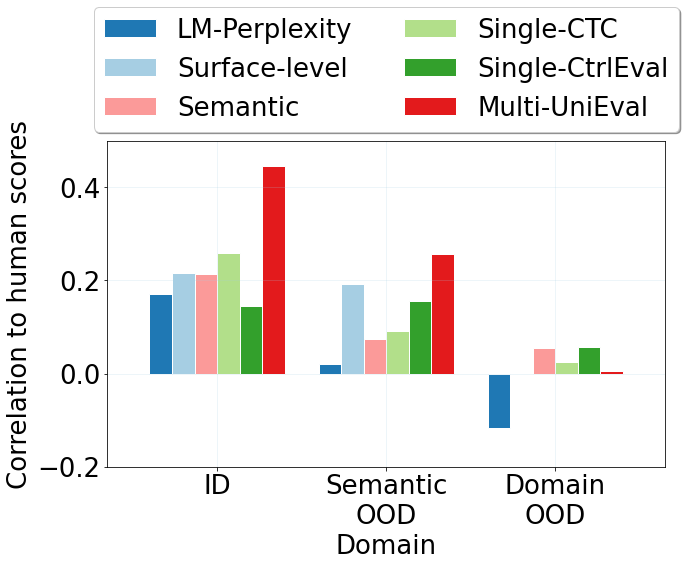

In [29]:
x = np.arange(3)

#colors = ["#A6CEE3", "#1F78B4", "#FB9A99",  "#B2DF8A", "#33A02C", "#E31A1C", "#FDBF6F", "#FF7F00"]
colors = ["#1F78B4", "#A6CEE3",  "#FB9A99",  "#B2DF8A", "#33A02C", "#E31A1C", "#FDBF6F", "#FF7F00"]
sns.set_palette(sns.color_palette(colors))

dataset = list(df.Domain.values)

# plot grouped bar chart
df.plot(x='Domain',
        kind='bar',
        stacked=False, edgecolor='white', width=.8)

plt.xticks(range(len(x)), dataset, rotation=0)
plt.xlabel('Domain')
plt.ylabel('Correlation to human scores')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.45),
          ncol=2, fancybox=True, shadow=True)
plt.grid(color="#A6CEE3", alpha=0.25)
plt.ylim(-0.2, 0.5)
plt.show()
#plt.savefig('../figures/transfer_corr_domain.pdf',bbox_inches='tight',pad_inches=0.05)

In [30]:
df_1 = pd.DataFrame([['TextSumm\n',-0.11642856689066021 , 0.21487227 , 0.21314482669677373, 0.26105014270784516, \
                      0.15646689412058332, 0.3410815421742805 ],\
                   ['DiagGen\n ', 0.1702544006952911 , 0.19294279 ,  0.07485591690237213 ,0.14658822097005317 ,\
                    0.07369740141862224,  0.29776391867713986], \
                   ['CtrlGen\n ', 0.02153148786001074  , 0.0 ,  0.054161230153410234 , 0.024485012398101615 , \
                    0.08596038333096787, 0.006192912349374125]],
                  columns=['NLGUsecases', 'LM-Perplexity', 'Surface-level',  'Semantic', \
                           'Single-CTC', 'Single-CtrlEval', 'Multi-UniEval'])

In [31]:
df_1

,NLGUsecases,LM-Perplexity,Surface-level,Semantic,Single-CTC,Single-CtrlEval,Multi-UniEval
0,TextSumm\n,-0.116429,0.214872,0.213145,0.261050,0.156467,0.341082
1,DiagGen\n,0.170254,0.192943,0.074856,0.146588,0.073697,0.297764
2,CtrlGen\n,0.021531,0.000000,0.054161,0.024485,0.085960,0.006193


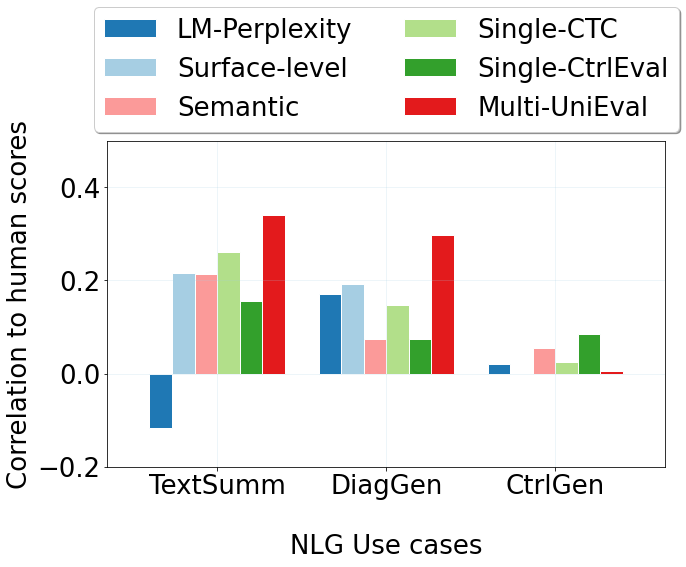

In [32]:
x = np.arange(3)

colors = ["#1F78B4", "#A6CEE3", "#FB9A99",  "#B2DF8A", "#33A02C", "#E31A1C", "#FDBF6F", "#FF7F00"]
sns.set_palette(sns.color_palette(colors))

# plot grouped bar chart
df_1.plot(x='NLGUsecases',
        kind='bar',
        stacked=False, edgecolor='white', width=.8)

nlg = ['TextSumm\n', 'DiagGen', 'CtrlGen']

plt.xticks(range(len(x)), nlg, rotation=0)
plt.xlabel('NLG Use cases')
plt.ylabel('Correlation to human scores')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.45),
          ncol=2, fancybox=True, shadow=True)
plt.grid(color="#A6CEE3", alpha=0.25)
plt.ylim(-0.2, 0.5)
plt.show()
#plt.savefig('../figures/transfer_corr_nlg.pdf',bbox_inches='tight',pad_inches=0.05)